# Pump it up  with SVM 
by Hajnalka Kristóffy

Data from the drivendata contest.  https://www.drivendata.org/competitions/44/page/82/)

I'll try to use and explain SVM. Tell me to break my leg.

# A. Import, settings

In [2]:
# A.1)  Import plotting 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [3]:
# A.2)  Import libraries for calculations
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [4]:
# A.3)  Use your own path, make notebook portable
mypath = "C:\\Users\\user\\Documents\\BpPy\\Afrika\\"

# B. Data preprocessing

In [5]:
# B.1)  Read in the data
train_0 = pd.read_csv(mypath+'Training_set_values.csv')
labels = pd.read_csv(mypath+'Training_set_labels.csv')
train = pd.concat([train_0, labels], axis=1)
contest_0 = pd.read_csv(mypath+'Test_set_values.csv')
fillin = pd.read_csv(mypath+'SubmissionFormat.csv')
contest = pd.concat([contest_0, fillin], axis=1)

In [6]:
# B.2.1a)  Examine the data
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional


In [7]:
# B.2.1b)  Examine the data
train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [8]:
# B.2.2a)  Examine the data
contest.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id,status_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,50785,predicted label
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,51630,predicted label
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,17168,predicted label
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,good,dry,dry,shallow well,shallow well,groundwater,other,other,45559,predicted label
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,49871,predicted label


In [9]:
# B.2.2b)  Examine the data
contest.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [10]:
# B.3.1 date)  Transform data into usable format
# datetime formats from objects first, isoformat is "YYYY-MM-DD".
train.date_recorded = pd.to_datetime(train.date_recorded)
contest.date_recorded = pd.to_datetime(contest.date_recorded)
#print (type(train.date_recorded[23]), train.columns)

In [11]:
# B.3.2)  Transform data into usable format
# Strings were read in as objects by default. Change the type to category!
cols5 = train.select_dtypes(include="object")  #print (cols5.columns)
for j in cols5.columns:  # hopefully you have the same columns in train and test. :D
    train[j] = train[j].astype('category')
    contest[j] = contest[j].astype('category')

In [12]:
# B.3.3)  Examine the data in the right format
train.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                         category
gps_height                        int64
installer                      category
longitude                       float64
latitude                        float64
wpt_name                       category
num_private                       int64
basin                          category
subvillage                     category
region                         category
region_code                       int64
district_code                     int64
lga                            category
ward                           category
population                        int64
public_meeting                 category
recorded_by                    category
scheme_management              category
scheme_name                    category
permit                         category
construction_year                 int64
extraction_type                category


In [13]:
# B.3.3)  Examine the data in the right format
print (type(train), type(contest)) #describe(include='all')

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


# C. The road to SVM
through linear and quadratic programming problems

# C.I.1. Linear Programming problem
max $f(x) = c^T x \hspace{1cm}$ e.g. $ 2x_1 + 2.2x_2  \hspace{1cm}$     the goal function that has to be optimized, sometimes it is called Z

subject to $A x <= d \hspace{1cm}$ e.g. $x_1 + 2x_2 <= 4  \hspace{1cm}$ and

$ \hspace{1.5cm} B x = p \hspace{1cm}$ e.g. $ x_1 + x_2 = 3    \hspace{1cm}$  and 

$ \hspace{1.5cm} x >= 0 \hspace{1cm}$ e.g. $  x_1, x_2 >= 0   \hspace{1cm} $ conditions  :  these have to be fulfilled too, simultaneously

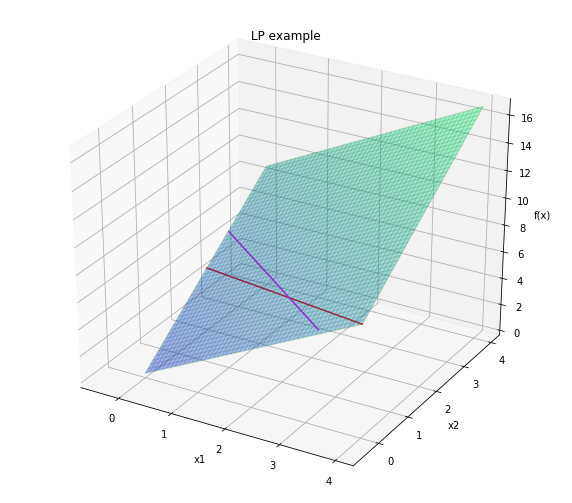

In [14]:
### C.I.1.a) Linear Programming problem example
x1 = np.linspace(0,4,50) ;x2 = np.linspace(0,4,50) 
y_c1 = np.linspace(0,2,50) ; x_c1 = 4-2*y_c1  ; z_c1 = 2*x_c1 + 2.2*y_c1 #  1st condition  x1+2*x2 <= 4
y_c2 = np.linspace(-0.5,3.4,50);x_c2 = 3-y_c2  ;z_c2 = 2*x_c1 + 2.2*y_c1  #  2nd condition  x1+x2 = 3
def z_function(x1, x2):    return 2*x1 + 2.2*x2  # returns a 2D surface array
plt.rcParams["figure.figsize"] = (10,9) ;ax = plt.axes(projection="3d")
X, Y = np.meshgrid(x1, x2) ; z = z_function(X, Y)
ax.plot3D(x_c1, y_c1, z_c1, 'red')  #  1st condition  x1+2*x2 <= 4
ax.plot3D(x_c2, y_c2, z_c2, 'magenta') #  2nd condition  x1+x2 = 3
ax.plot_wireframe(X, Y, z, color='green',alpha=.2)
ax.plot_surface(X, Y, z, rstride=1, cstride=1,cmap='winter', edgecolor='none',alpha=.3)
ax.set_xlabel('x1') ; ax.set_ylabel('x2'); ax.set_zlabel('f(x)'); ax.set_title('LP example')
plt.show()

# C.I.2. Quadratic Programming problem
max $f(x) = x^T Q x +c^T x \hspace{1cm}$ e.g. $ (x_1-1)^2 + (x_2-1.5)^2  \hspace{1cm}$     the goal function that has to be optimized, sometimes it is called Z

subject to $A x <= d \hspace{1cm}$ e.g. $x_1 + 2x_2 <= 4  \hspace{1cm}$ and

$ \hspace{1.5cm} B x = p \hspace{1cm}$ e.g. $ x_1 + x_2 = 3    \hspace{1cm}$  and 

$ \hspace{1.5cm} x >= 0 \hspace{1cm}$ e.g. $  x_1, x_2 >= 0   \hspace{1cm} $ conditions  

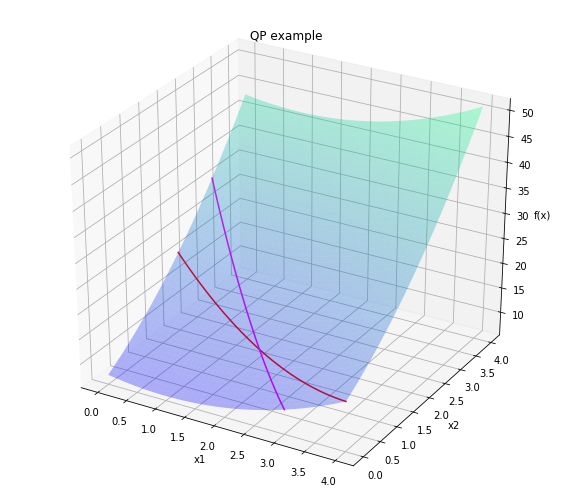

In [15]:
### C.I.2.a) Quadratic Programming problem example
x1 = np.linspace(0,4,50) ;x2 = np.linspace(0,4,50) ;y_c1 = np.linspace(0,2,50)
x_c1 = 4-2*y_c1  ;z_c1 = (x_c1-1)**2 + (y_c1+2.5)**2  #  1st condition  x1+2*x2 <= 4
y_c2 = np.linspace(0,3,50);x_c2 = 3-y_c2  ;z_c2 = (x_c2-1)**2 + (y_c2+2.5)**2  #  2nd condition  x1+x2 = 3
def z_function(x1, x2):
    return  (x1-1)**2 + (x2+2.5)**2  
ax = plt.axes(projection="3d");X, Y = np.meshgrid(x1, x2);z = z_function(X, Y)
ax.plot3D(x_c1, y_c1, z_c1, 'red')  #  1st condition  x1+2*x2 <= 4
ax.plot3D(x_c2, y_c2, z_c2, 'magenta')  #  2nd condition  x1+x2 = 3
ax.plot_surface(X, Y, z, rstride=1, cstride=1,cmap='winter', edgecolor='none',alpha=.3)
ax.set_xlabel('x1') ; ax.set_ylabel('x2'); ax.set_zlabel('f(x)');ax.set_title('QP example')
plt.show()

# C.II. Linear SVM with overlapping classes
We have data with $x_i$ in $R^p$ , and $y_i$ in $\{-1,1\}$ (if we multiply with it, we get the sign of the fn below)

In [16]:
### C.II.a) Artificial examples from two regions, one's good and others' bad wells, and vica versa
### svm_X... and svm_label... are the data for the SVM calculation, and df... arefor plotting
# Separable data, 100 wells. 
separable = train.query('((region_code == 3) and (status_group == "functional")) or ((region_code == 2) and (status_group == "non functional"))')
separable = separable.query('longitude != 0')
svm_X100 = separable.iloc[0:100,6:8]  # only longitude and latitude for svm training
svm_label100 = np.where(separable['status_group'] == 'functional',1,-1)[0:100] # y_i for the svm
df100  = pd.DataFrame(svm_X100).copy()                                       # deepcopy
df100['color'] = np.where(separable['status_group'] == 'functional','blue','red')[0:100] # y for the plot

# Not so separable data, same regions other wells, out of which we mix 10 to the above 
versa = train.query('((region_code==3) and (status_group=="non functional")) or ((region_code==2) and (status_group=="functional"))')
versa = versa.query('longitude != 0')
versa10 = versa.query('(latitude < -3.1) and (latitude > -3.3) and (longitude < 37.1) and (longitude > 36.9)')
X10 = versa10.iloc[0:10,6:8]  # only longitude and latitude for svm training
svm_X110 = svm_X100.append(X10) # put it quickly before adding 'color'
lbl10 = np.where(versa10['status_group'] == 'functional',1,-1)[0:10] # for the svm
X10['color'] = np.where(versa10['status_group'] == 'functional','blue','red')[0:10] # for the plot
svm_label110 = np.append(svm_label100,lbl10)
df110  = df100.append(X10)

# Absoloutely not separable data, 50 wells mixed to the separable data
X50 = versa.iloc[0:50,6:8]  # only longitude and latitude for svm training
svm_X150 = svm_X100.append(X50) # put it quickly before adding 'color'
lbl50 = np.where(versa['status_group'] == 'functional',1,-1)[0:50] # for the svm
X50['color'] = np.where(versa['status_group'] == 'functional','blue','red')[0:50] # for the plot
svm_label150 = np.append(svm_label100,lbl50)
df150  = df100.append(X50)

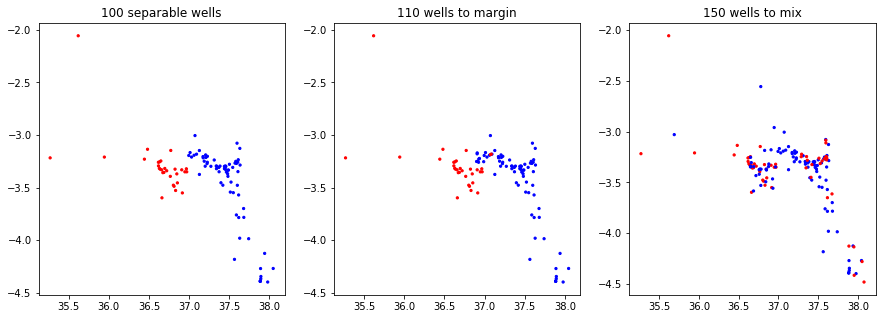

In [17]:
### C.II.b)  Plot the above datasets
fig, ax = plt.subplots(1,3,figsize=(15,5))# print(ax_lst) # a figure object with 3 pointers
ax[0].scatter('longitude', 'latitude',data=df100,facecolor=df100['color'],s=5)
ax[1].scatter('longitude', 'latitude',data=df110,facecolor=df110['color'],s=5)
ax[2].scatter('longitude', 'latitude',data=df150,facecolor=df150['color'],s=5)
ax[0].set_title('100 separable wells');ax[1].set_title('110 wells to margin')
ax[2].set_title('150 wells to mix')
plt.show()

# C.II.1. Creating the SVM problem
We need a linear function (a hyperplane) that separates our data with a margin $m$ : $ {x \mapsto f(x) = v^T x + a = 0} $   

We also need slack variables $\color{blue}{\xi_i}$ so that $\color{blue}{\xi_i} \geq 0$ and $\sum_{i=1}^N \color{blue} {\xi_i} \leq \text{constant}$ . The slack variables will model potential errors in the classification and they need to be minimal. Let's call C the weight of their being minimal. 

The distance of the hyperplane from the data is $\large{\frac{m}{||v||} =  \frac{|v^T x + a|}{||v||}}$  in vector notation, but we need a better function with continuous derivative to optimize.

Let's change the variable, so let the vector $w = \large{\frac{v}{m ||v||} }$  and $b = \large{\frac{a}{m ||v||} }$. Its norm $||w|| = \large{\frac1m}$  expresses the distance of the hyperplane and the margin but the resulting function is not practical for optimization. Instead, we need to minimize the squared norm of $w$ (it has continuous derivative unlike the norm). 

Our SVM problem looked like this: $\hspace{2cm} $ After the variable change and squaring the norm:

$\max_{v,a} m  \hspace{6.5cm}  \min_{w,b} \frac12||w||^2 \color{blue}{+C \sum_{i=1}^{n}\xi_i}$ 

$ \color{blue}{\min C \sum_{i=1}^{n}\xi_i \hspace{5.8cm} \xi_i \geq 0 }$

with $ \large{\frac{y_i(v^T x_i + a)}{||v||} } \normalsize{\geq m ; i=1,...,n } \hspace{1.7cm} $ 
with $ y_i(w^T x_i + b) \geq 1\color{blue}{-\xi_i} ; i=1,...,n $

The decision function based on this is still: $D(x) = sign(v^T x + a)$ having the same sign as $(w^T x_i+b)$  


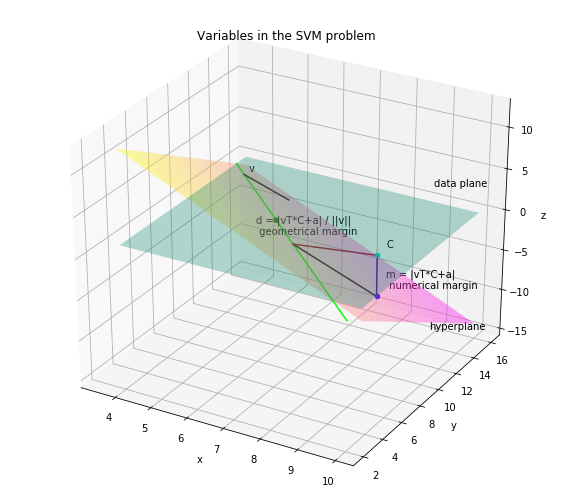

In [18]:
### C.II.1.a) Variables in the SVM problem
def z_function(x, y):
    return -2*x - y +22  # vT * [x,y] + a = 0 the hyperplane
def z_0(x, y):
    return 0*x - 0*y   # the data plane 
Bx = 6 ; By = 10 ; Bz = z_function(Bx, By);B0 =0 
Cx = 9 ; Cy = 9 ; Cz = z_function(Cx, Cy);C0 =0;Cm = np.linspace(0,Cz,50)
Cvx = np.linspace(Cx-2,Cx,50); Cvy = np.linspace(Cy-1,Cy,50)
Vx = 4 ; Vy = 14; Vz = z_function(Vx+1, Vy+1);V0 = 0;Vm = np.linspace(Vz,0,50)
Vmx = np.linspace(Vx+1,Vx,50);Vmy = np.linspace(Vy+1,Vy,50)
vxh = np.linspace(3.5,10,50) ; vyh = -2*vxh +22 ; v0h = z_0(vxh, vyh)
ax = plt.axes(projection="3d",)
X, Y = np.meshgrid(np.linspace(3.5,10,50),np.linspace(3.5,16,50))
Z = z_function(X, Y);  Z0 = z_0(X,Y)
ax.scatter3D(Bx, By, (Bz,B0), color='green')
ax.scatter3D(Cx,Cy,Cz, color='blue');ax.scatter3D(Cx,Cy,C0, color='darkturquoise')
ax.plot3D(vxh,vyh,v0h, color='lime');ax.plot3D([Cx,]*50,[Cy,]*50,Cm, color='darkblue');
#ax.scatter3D(Vx+1,Vy+1,Vz, color='black');ax.scatter3D(Vx,Vy,V0, color='black')
ax.plot3D(Vmx,Vmy,Vm, color='black') 
ax.plot3D(Cvx,Cvy,Cm, color='black');ax.plot3D(Cvx,Cvy,C0, color='darkred') 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,cmap='spring', edgecolor='none',alpha=.4)
ax.plot_surface(X, Y, Z0, rstride=1, cstride=1,cmap='summer', edgecolor='none',alpha=.3)
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
ax.set_title('Variables in the SVM problem');
ax.text(9,10,-5,s='m = |vT*C+a| \n numerical margin')
ax.text(9,10,0,s='C');ax.text(9,15,-15,s='hyperplane');ax.text(9,15,3,s='data plane')
ax.text(4,14.5,0,s='v'); ax.text(6,8,0,s='d = |vT*C+a| / ||v|| \n geometrical margin')
plt.show()

# C.II.2. It is a Quadratic Programming problem*
* for which we have standard solvers. Hoorray! That's what we wanted! 

To find the extrema of a quadratic goal function we would need its derivatives set to zero. 

The saddle points of the Lagrangian of (the quadratic goal function minus the equality constraints) are the extrema of the original linearly constrained problem. If we have inequality constraints, we have to apply the KKT conditions (below) as linear constraints and use the Lagrangian dual function or the Wolfe dual function to find the extrema of the original problem.

The Lagrange Dual problem of the above Quadratic Programming problem (C.II.1. after the variable change) is: 

$\min_{w,b} \max_{\alpha,\beta} Lp(w,b,\alpha,\beta) = \frac12 ||w||^2  \color{blue}{+ C \sum_{i=1}^N {\xi_i}} - \sum_{i=1}^N {\alpha_i  (y_i  (w^Tx_i+b)-1 \color{blue}{+\xi_i})- \color{blue}{\sum_{i=1}^{N} \beta_i \xi_i }}  \hspace{0.5cm}$ 
where $\alpha_i \geq 0 $  are the Lagrange multiplicators.

Since we will need KKT anyway and derivatives still show extrema, let us set the derivatives of $Lp$ equal to 0 , express $w$, $b$ and $\color{blue}{\xi_i}$, and write up all KKT conditions of optimality:

$\nabla_w Lp =0 $ ; $\hspace{1cm}  w = \sum_{i=1}^N {\alpha_i y_i x_i} \hspace{2cm}$ # $\color{brown} {\text{KKT1 - stationarity/optimality/saddle points}}$

$\large{\frac{\partial Lp}{\partial b}}$$ = 0$ ; $\hspace{1cm} \sum_{i=1}^N {\alpha_i y_i} =0 \hspace{2cm}$ # $\color{green} {\text{KKT1 - stationarity/optimality/saddle points}}$

$\large{\frac{\partial Lp}{\partial \color{blue}{\xi_i}}}$$ =0 $ ; $\hspace{1cm} \color{blue} {C-\alpha_i-\beta_i =0 }   \hspace{1cm}$  $\color{indigo} {\text{KKT1 - stationarity/optimality/saddle points }}$

$y_i(w^T x_i+b) \geq 1 \hspace{1cm} \color{blue}{\xi_i \geq 0 } \hspace{1cm} $  # KKT2 - primal admissibility, i.e. primal conditions

$\alpha_i \geq 0 \hspace{1cm}  \color{blue}{\beta_i=C-\alpha_i \geq 0 }\hspace{1cm}  $# KKT3 - dual admissibility, i.e. (Wolfe) dual conditions

$\alpha_i (y_i (w^T x_i+b)-1 \color{blue}{+\xi_i})=0 \hspace{0.5cm} \color{blue}{\beta_i \xi_i = (C-\alpha_i)\xi_i =0 }\hspace{0.5cm} $  for all $i \hspace{1cm}$ # KKT4 - complementarity, i.e. SVM has support points and other data points

If we substitute $w$, $b$ and $\beta_i$ into the $Lp$ function, we get the Wolfe Dual $Ld$ (I color here to help simplification):

$\max_{\alpha} Ld(w,b,\alpha) = \color{brown}{\frac12 \sum_{i=1}^N {\alpha_i(y_i ( x_i))} \sum_{i=1}^N {\alpha_i (y_i (x_i))}} + \color{indigo}{C \sum_{i=1}^N {\xi_i}} - \color{brown}{\sum_{i=1}^N \sum_{i=1}^N {\alpha_i y_i \alpha_i y_i x_i^T x_i }} + \color{green}{b \sum_{i=1}^N {\alpha_i  y_i }}  + 1*\sum_{i=1}^N {\alpha_i } - \color{indigo}{\sum_{i=1}^N {\alpha_i  \xi_i} - \sum_{i=1}^N {C \xi_i}  + \sum_{i=1}^N {\alpha_i  \xi_i} }$

Now we need only to solve 

$\min_{\alpha} Ld(\alpha) =   \frac12 (\sum_{i=1}^N \sum_{j=1}^N {\alpha_i \alpha_j  y_i  y_j  x_i^T  x_j}   \sum_{i=1}^{N} \alpha_i^2 ) - \sum_{i=1}^N {\alpha_i}$ 

subject to : $\sum_{i=1}^N {\alpha_i y_i} =  0 $ , $0\leq\alpha_i \color{blue}{\leq C }$




# C.II.3. Fitting the SVM with python / libsvm SVC algorithm

In [131]:
### C.II.3.a)  Creating the sklearn support vector classifier with linear (= no) kernel function. 
svc100 = SVC(kernel='linear') 
svc110 = SVC(kernel='linear')
svc150 = SVC(kernel='linear', C=1) # the original builtin C =1, but it can be changed

In [132]:
### C.II.3.b) Fit the classifier to the separable data
svc100.fit(svm_X100, svm_label100)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [133]:
### C.II.3.c) Fit the classifier to the almost separable data
svc110.fit(svm_X110, svm_label110)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [134]:
### C.II.3.d) Fit the classifier to the not separable data
svc150.fit(svm_X150, svm_label150)

SVC(C=50000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [135]:
### C.II.3.e)  Create grid to evaluate models
xx = np.linspace(35.5, 38, 300) #; print(xx)
yy = np.linspace(-4.5, -2, 300)  #; print(yy)
YY, XX = np.meshgrid(yy, xx)  #; print(XX) ; print(YY)
xy = np.vstack([XX.ravel(), YY.ravel()]).T # ; print(xy)

In [136]:
### C.II.3.f)  Evaluate models' decision function
Z100 = svc100.decision_function(xy).reshape(XX.shape)
Z110 = svc110.decision_function(xy).reshape(XX.shape)
Z150 = svc150.decision_function(xy).reshape(XX.shape)

In [137]:
### C.II.3.g)  Evaluate models' decision function
def levels2D(XX, YY ,ZZ ,val, epsi): 
    """ numpy ndarray of fn values, scalar value to get coordinates for"""
    Xlev = XX.copy() ; Ylev = YY.copy() #; Zlev = ZZ.copy()
    for i in range(ZZ.shape[0]):  # vertical, across sublists
        for j in range(ZZ.shape[1]):  # horizontal, within a sublist
         #   print('i,j',i,j,'yo[i]: ',yopt,'gridvals: ',gridvals[i,j])
            if abs(ZZ[i,j]-val) > epsi:
                Xlev[i,j] = None ; Ylev[i,j]= None 
    return np.vstack([Xlev.ravel(),Ylev.ravel()]).T

In [138]:
### C.II.3.g) level0: Z =0 decision boundary
level0_100 = pd.DataFrame(levels2D(XX,YY,Z100,0,0.005),columns=('longitude', 'latitude')).dropna()
level0_110 = pd.DataFrame(levels2D(XX,YY,Z110,0,0.005),columns=('longitude', 'latitude')).dropna()
level0_150 = pd.DataFrame(levels2D(XX,YY,Z150,0,0.005),columns=('longitude', 'latitude')).dropna()
# level1: Z =1, positive margin
level1_100 =  pd.DataFrame(levels2D(XX,YY,Z100,1,0.005),columns=('longitude', 'latitude')).dropna() 
level1_110 =  pd.DataFrame(levels2D(XX,YY,Z110,1,0.005),columns=('longitude', 'latitude')).dropna() 
level1_150 =  pd.DataFrame(levels2D(XX,YY,Z150,1,0.005),columns=('longitude', 'latitude')).dropna() 
# leve_1: Z =-1, negative margin
level_1_100 =  pd.DataFrame(levels2D(XX,YY,Z100,-1,0.005),columns=('longitude', 'latitude')).dropna() 
level_1_110 =  pd.DataFrame(levels2D(XX,YY,Z110,-1,0.005),columns=('longitude', 'latitude')).dropna() 
level_1_150 =  pd.DataFrame(levels2D(XX,YY,Z150,-1,0.005),columns=('longitude', 'latitude')).dropna() 


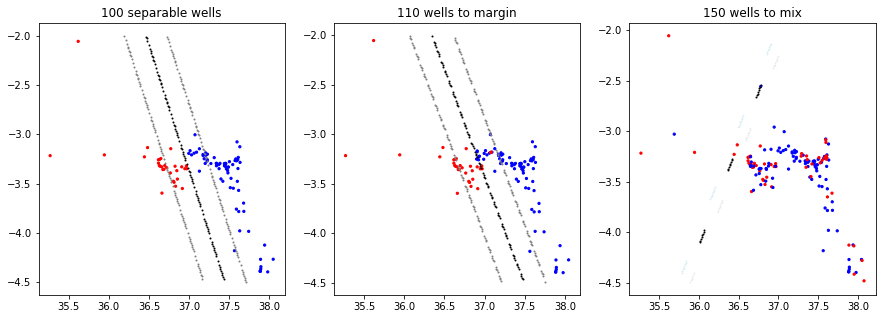

In [139]:
### C.II.3.h)  Plot the above datasets
fig, ax = plt.subplots(1,3,figsize=(15,5))# print(ax_lst) # a figure object with 3 pointers
ax[0].scatter('longitude', 'latitude',data=df100,facecolor=df100['color'],s=5)
ax[0].scatter('longitude', 'latitude',data=level0_100,facecolor='black',s=1)
ax[0].scatter('longitude', 'latitude',data=level1_100,facecolor='grey',s=1)
ax[0].scatter('longitude', 'latitude',data=level_1_100,facecolor='grey',s=1)
ax[1].scatter('longitude', 'latitude',data=df110,facecolor=df110['color'],s=5)
ax[1].scatter('longitude', 'latitude',data=level0_110,facecolor='black',s=1)
ax[1].scatter('longitude', 'latitude',data=level1_110,facecolor='grey',s=1)
ax[1].scatter('longitude', 'latitude',data=level_1_110,facecolor='grey',s=1)
ax[2].scatter('longitude', 'latitude',data=df150,facecolor=df150['color'],s=5)
ax[2].scatter('longitude', 'latitude',data=level0_150,facecolor='black',s=1)
ax[2].scatter('longitude', 'latitude',data=level1_150,facecolor='grey',s=1,alpha=0.1)
ax[2].scatter('longitude', 'latitude',data=level_1_150,facecolor='lightblue',s=1,alpha=0.31)
ax[0].set_title('100 separable wells');ax[1].set_title('110 wells to margin')
ax[2].set_title('150 wells to mix') ;  plt.show()

In [140]:
### C.II.3.i) What just happened ?????
np.set_printoptions(precision=3)
print ("Fit status:     100:", svc100.fit_status_,
       "                110:",svc110.fit_status_,
       "                150:",svc150.fit_status_) 
# 0 means OK
print ("Supports number:100:",len(svc100.support_vectors_), # 28, interesting
       "               110:",len(svc110.support_vectors_), # 38 a bit worse
       "               150:",len(svc150.support_vectors_)) # 115 blows up
#print (svc100.dual_coef_,svc110.dual_coef_,svc150.dual_coef_) # for sensitivity analysis
print ("w coefficients: 100:", svc100.coef_, 
       "  110:",svc110.coef_, "  150:",svc150.coef_)
print ("b intercept:    100:",svc100.intercept_,
       "       110:",svc110.intercept_,
       "       150:",svc150.intercept_)
print ("Class weight:   100:",svc100.class_weight_,
       "          110:",svc110.class_weight_,
       "          150:",svc150.class_weight_)
print ("Parameters 100:",svc100.get_params(deep=True),
       "\n Parameters 110:",svc110.get_params(deep=True),
       "\n Parameters 150:",svc150.get_params(deep=True))

Fit status:     100: 0                 110: 0                 150: 0
Supports number:100: 28                110: 38                150: 79
w coefficients: 100: [[3.782 1.487]]   110: [[3.639 1.671]]   150: [[12.992 -6.42 ]]
b intercept:    100: [-134.921]        110: [-128.905]        150: [-494.147]
Class weight:   100: [1. 1.]           110: [1. 1.]           150: [1. 1.]
Parameters 100: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 
 Parameters 110: {'C': 1.0, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'auto_deprecated', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False} 
 Parameters 150: {'C': 50000, 'cache_size': 

# C.II.4. The end of the linear SVM
As we can see, in case of the absolutely unseparable dataset the SVC algorithm yields strange results. 

 # Thank you :)

References.:   
 * matplotlib, pandas, scikit-learn and numpy docs (Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.)
 
 * http://econ.lse.ac.uk/staff/wdenhaan/numerical/functionapproximation.pdf
 
 * https://wwwhome.ewi.utwente.nl/~stillgj
        
 * Elements of Statistical Learning II
        
 * Stéphane Canu's lectures for SVM programming in MATLAB
 
 * Wikipedia (Lagrangie multiplicator, Wolfe duality) 
 
 * https://math.stackexchange.com/questions/1815810/why-do-we-minimize-the-squared-norm-instead-of-the-norm-in-this-optimization-pro
 
 * https://math.stackexchange.com/questions/436901/svm-min-square-norm
 
 * https://towardsdatascience.com/an-easy-introduction-to-3d-plotting-with-matplotlib-801561999725